In [28]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
import AC

In [2]:
def getRandomPoint(data:'Conjunto de Datos', k:'Numero de puntos a generar', fromPoints=False):
    if fromPoints:
        n = data.shape[0]
        index = np.arange(n)
        choice = np.random.choice(index, size=k,replace=False)
        return data[choice]
    else:
        rangeValues = np.c_[data.min(axis=0),data.max(axis=0)]
        randomPoints = [[np.random.uniform(*r) for r in rangeValues] for _ in range(k)]
        return np.array(randomPoints)

In [3]:
def createCluster(center:'Size of d', std, size, *, d=1):
    randomPart = np.random.normal(0, std, size=(size,d))
    return randomPart + center

In [136]:
distance = lambda v, u: np.linalg.norm(v-u, axis=2)

In [34]:
n = 30//3
# First cluster
x1 = createCluster(center=4, std=1.5, size=n, d=2)
t1 = np.full((n,),0)
# Second cluster
x2 = createCluster(center=-3, std=1, size=n, d=2)
t2 = np.full((n,),1)
# Third cluster
x3 = createCluster(center=0, std=2, size=n, d=2)
t3 = np.full((n,),2)
# Concatenate clusters
X = np.r_[x1,x2,x3]
T = np.r_[t1,t2,t3]
# Get unique classes
uniqueClasses = np.unique(T).astype('uint8')

In [35]:
# Create random instance
w = getRandomPoint(X,k=1)

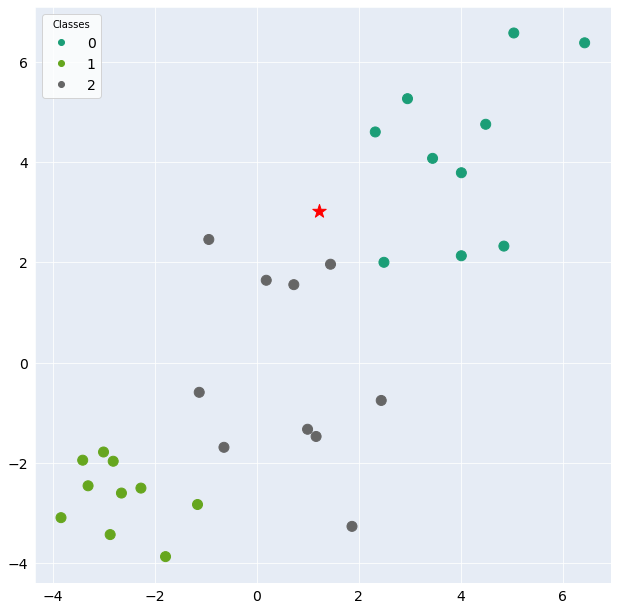

In [50]:
ax = AC.createFigures(figsize=(10,10))
scatter = ax.scatter(x=X[:,0],y=X[:,1], c=T, cmap='Dark2', label='Clases', s=100);
ax.legend(scatter.legend_elements()[0],uniqueClasses, fontsize=14, title='Classes');
ax.scatter(x=w[:,0],y=w[:,1], color='r', marker='*', s=200);

In [79]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X,T.ravel())
model.predict(w)

array([0])

In [80]:
dist, indx = model.kneighbors(w)
dist.T;

In [81]:
X[indx];

In [82]:
distance(X[indx],w)

array([[1.09279825, 1.55277201, 1.64420798, 1.72610791, 1.92434583,
        2.22925494, 2.4680652 , 2.83448318, 2.90198705, 2.94114947]])

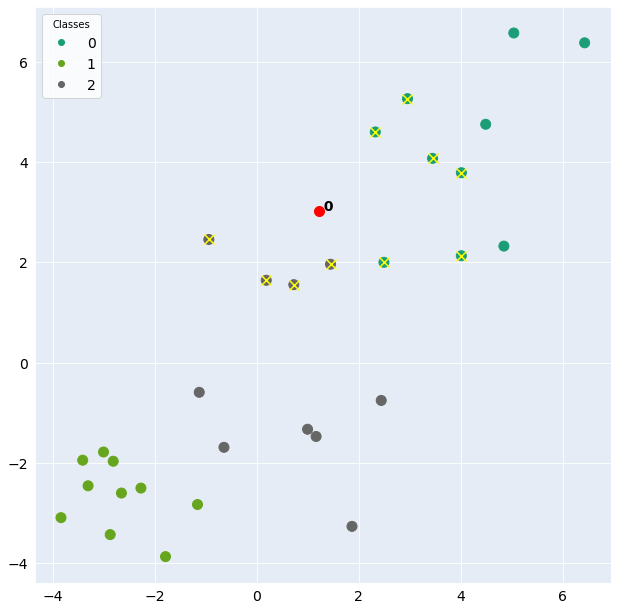

In [83]:
ax = AC.createFigures(figsize=(10,10))
scatter = ax.scatter(x=X[:,0],y=X[:,1], c=T, cmap='Dark2', label='Clases', s=100);
ax.legend(scatter.legend_elements()[0],uniqueClasses, fontsize=14, title='Classes');
ax.scatter(x=w[:,0],y=w[:,1], color='r', s=100);
ax.text(*w.T,s=f' {int(model.predict(w))}', fontsize=14, fontweight='bold',horizontalalignment='left')
ax.scatter(x=X[indx,0],y=X[indx,1], marker='x', color='yellow', s=100);

In [208]:
n = 100
X = np.sort(2*np.pi* np.random.rand(n, 1), axis=0)
y = 1- np.exp(-X)

In [220]:
T = 7#3*np.pi/4
T = np.array(T).reshape(-1,1)

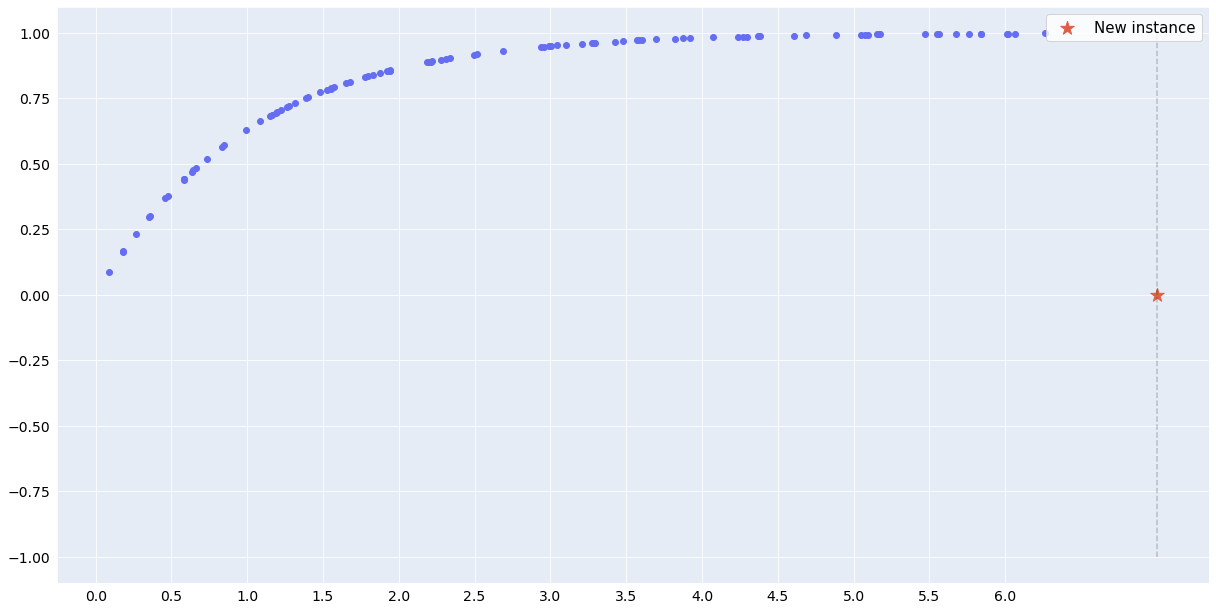

In [221]:
ax = AC.createFigures(figsize=(20,10))
ax.scatter(X,y, color=AC.specialPurple);
ax.vlines(T, ymin=-1,ymax=1, color='k', alpha=0.2, linestyle='dashed')
ax.set_xticks(np.arange(0,2*np.pi,0.5));
ax.scatter(T,0, s=200, color=AC.specialRed, marker='*', label='New instance')
ax.legend(fontsize=15);

In [222]:
model = KNeighborsRegressor(n_neighbors=20)
model.fit(X,y)

KNeighborsRegressor(n_neighbors=20)

In [223]:
Ty = model.predict(T)

In [224]:
dist, indx = model.kneighbors(T)

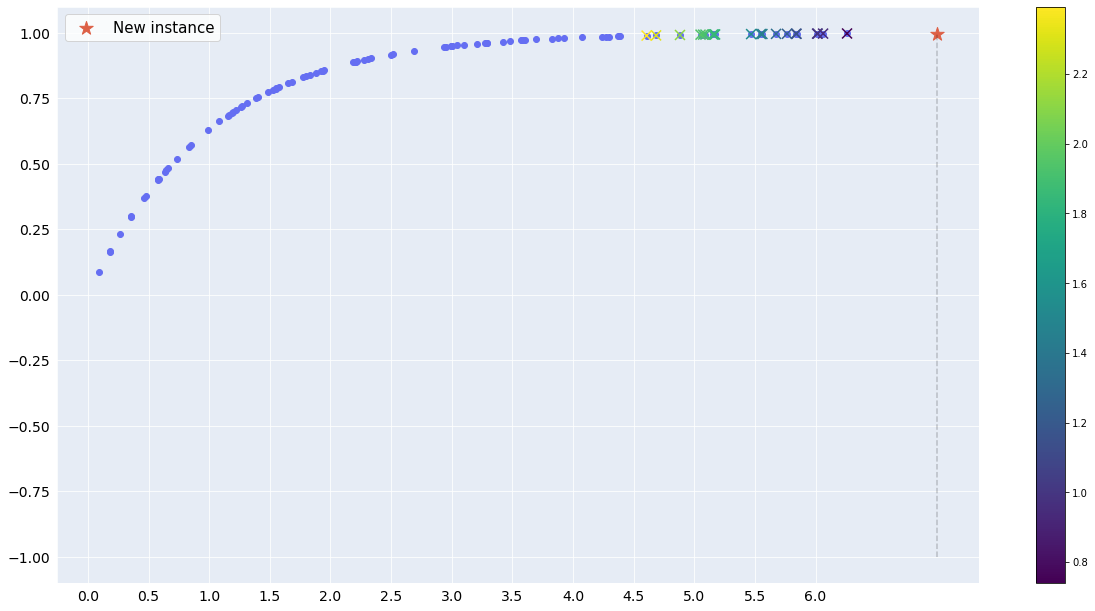

In [225]:
ax = AC.createFigures(figsize=(20,10))
ax.scatter(X,y, color=AC.specialPurple);
ax.vlines(T, ymin=-1,ymax=1, color='k', alpha=0.2, linestyle='dashed')
ax.set_xticks(np.arange(0,2*np.pi,0.5));
ax.scatter(T,Ty, s=200, color=AC.specialRed, marker='*', label='New instance')
scatter = ax.scatter(x=X[indx],y=y[indx], c=dist, marker='x', cmap='viridis', s=100);
plt.colorbar(scatter, ax=ax)
ax.legend(fontsize=15);

In [226]:
model.predict(T)

array([[0.99518939]])

In [227]:
y[indx].mean()

0.9951893850071455

In [228]:
from sklearn.model_selection import train_test_split

In [231]:
X.shape

(100, 1)

In [238]:
X1, X2, y1, y2 = train_test_split(X,y)

In [233]:
X1.shape

(75, 1)

In [237]:
y2.shape

(25, 1)

PAra que un algoritmo se clasifique como que aprenda este tiene que modificar parametros internos.